<a href="https://colab.research.google.com/github/govardhan-06/DL-models/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1. Data Ingestion phase

In [3]:
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor, Compose, Resize
import torchvision.datasets

transform=Compose([
    Resize((224,224)),
    ToTensor()
    ])

train_set= torchvision.datasets.CIFAR100(
    root="root",
    train=True,
    transform=transform,
    target_transform=None,
    download=True
)

test_set= torchvision.datasets.CIFAR100(
    root="root",
    train=False,
    transform=transform,
    target_transform=None,
    download=True
)

100%|██████████| 169001437/169001437 [00:03<00:00, 43329388.40it/s]


Extracting root/cifar-100-python.tar.gz to root
Files already downloaded and verified


In [4]:
print(f"Length of train set: {len(train_set)}")
print(f"Length of test set: {len(test_set)}")

Length of train set: 50000
Length of test set: 10000


In [5]:
print(train_set)
print("\n")
print(test_set)

Dataset CIFAR100
    Number of datapoints: 50000
    Root location: root
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


Dataset CIFAR100
    Number of datapoints: 10000
    Root location: root
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [6]:
class_names=train_set.class_to_idx
class_names={value:key for key,value in class_names.items()}
class_names

{0: 'apple',
 1: 'aquarium_fish',
 2: 'baby',
 3: 'bear',
 4: 'beaver',
 5: 'bed',
 6: 'bee',
 7: 'beetle',
 8: 'bicycle',
 9: 'bottle',
 10: 'bowl',
 11: 'boy',
 12: 'bridge',
 13: 'bus',
 14: 'butterfly',
 15: 'camel',
 16: 'can',
 17: 'castle',
 18: 'caterpillar',
 19: 'cattle',
 20: 'chair',
 21: 'chimpanzee',
 22: 'clock',
 23: 'cloud',
 24: 'cockroach',
 25: 'couch',
 26: 'crab',
 27: 'crocodile',
 28: 'cup',
 29: 'dinosaur',
 30: 'dolphin',
 31: 'elephant',
 32: 'flatfish',
 33: 'forest',
 34: 'fox',
 35: 'girl',
 36: 'hamster',
 37: 'house',
 38: 'kangaroo',
 39: 'keyboard',
 40: 'lamp',
 41: 'lawn_mower',
 42: 'leopard',
 43: 'lion',
 44: 'lizard',
 45: 'lobster',
 46: 'man',
 47: 'maple_tree',
 48: 'motorcycle',
 49: 'mountain',
 50: 'mouse',
 51: 'mushroom',
 52: 'oak_tree',
 53: 'orange',
 54: 'orchid',
 55: 'otter',
 56: 'palm_tree',
 57: 'pear',
 58: 'pickup_truck',
 59: 'pine_tree',
 60: 'plain',
 61: 'plate',
 62: 'poppy',
 63: 'porcupine',
 64: 'possum',
 65: 'rabbit',

In [7]:
print("Sample data:")
print(train_set.__getitem__(10))

Sample data:
(tensor([[[0.3255, 0.3255, 0.3255,  ..., 0.1373, 0.1373, 0.1373],
         [0.3255, 0.3255, 0.3255,  ..., 0.1373, 0.1373, 0.1373],
         [0.3255, 0.3255, 0.3255,  ..., 0.1373, 0.1373, 0.1373],
         ...,
         [0.5882, 0.5882, 0.5882,  ..., 0.5804, 0.5804, 0.5804],
         [0.5882, 0.5882, 0.5882,  ..., 0.5804, 0.5804, 0.5804],
         [0.5882, 0.5882, 0.5882,  ..., 0.5804, 0.5804, 0.5804]],

        [[0.5176, 0.5176, 0.5176,  ..., 0.2314, 0.2314, 0.2314],
         [0.5176, 0.5176, 0.5176,  ..., 0.2314, 0.2314, 0.2314],
         [0.5176, 0.5176, 0.5176,  ..., 0.2314, 0.2314, 0.2314],
         ...,
         [0.6275, 0.6275, 0.6275,  ..., 0.5294, 0.5294, 0.5294],
         [0.6275, 0.6275, 0.6275,  ..., 0.5294, 0.5294, 0.5294],
         [0.6275, 0.6275, 0.6275,  ..., 0.5294, 0.5294, 0.5294]],

        [[0.6980, 0.6980, 0.6980,  ..., 0.3686, 0.3686, 0.3686],
         [0.6980, 0.6980, 0.6980,  ..., 0.3686, 0.3686, 0.3686],
         [0.6980, 0.6980, 0.6980,  ..., 0.36

### Checking the input and output

In [8]:
image, label = train_set.__getitem__(0)
print(f"Image shape: {image.shape} -> [colour_channels,height,width]")
print(f"Image label: {label}")

Image shape: torch.Size([3, 224, 224]) -> [colour_channels,height,width]
Image label: 19


### Visualizing the image

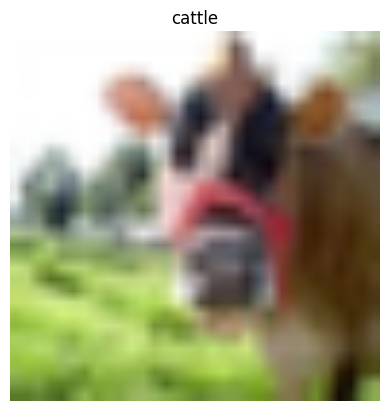

In [9]:
import matplotlib.pyplot as plt
plt.imshow(image.permute(1,2,0), cmap="gray")
plt.axis("off")
plt.title(class_names[label])
plt.show()

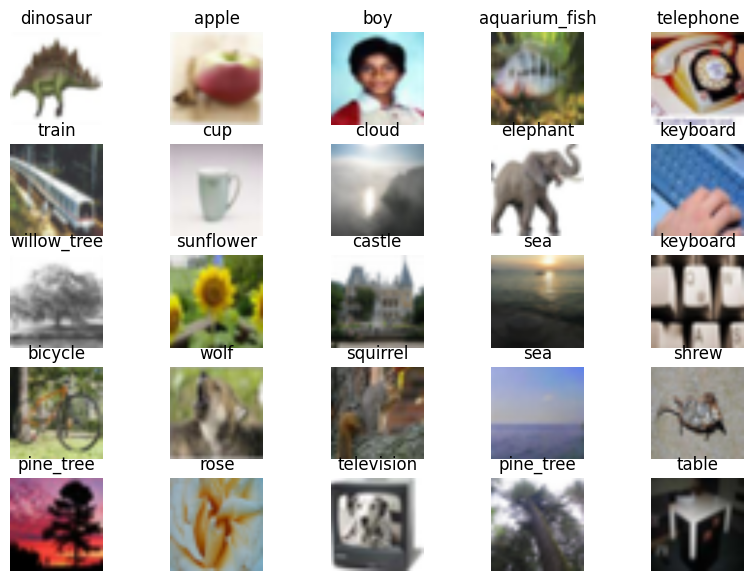

In [10]:
torch.manual_seed(42)
rows,cols=5,5
plt.figure(figsize=(10,7))
for i in range(1,rows*cols+1):
  img,label=train_set[i]
  plt.subplot(rows,cols,i)
  plt.imshow(img.permute(1,2,0),cmap="gray")
  plt.title(class_names[label])
  plt.axis('off')

### Turning image data to batches

In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader= DataLoader(train_set,BATCH_SIZE,shuffle=True)
test_dataloader= DataLoader(test_set,BATCH_SIZE,shuffle=True)

In [12]:
print(f"Length of train dataloader: {len(train_dataloader)} batches of batch size : {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of batch size : {BATCH_SIZE}")

Length of train dataloader: 1563 batches of batch size : 32
Length of test dataloader: 313 batches of batch size : 32


### Inspection image inside the batch

In [13]:
train_batch_image, train_batch_label=next(iter(train_dataloader))
print(f"Image batch shape: {train_batch_image.shape} -> [batch_size,colour_channels,height,width]")
print(f"Label batch shape: {train_batch_label.shape} -> [batch_size]")

Image batch shape: torch.Size([32, 3, 224, 224]) -> [batch_size,colour_channels,height,width]
Label batch shape: torch.Size([32]) -> [batch_size]


First Batch


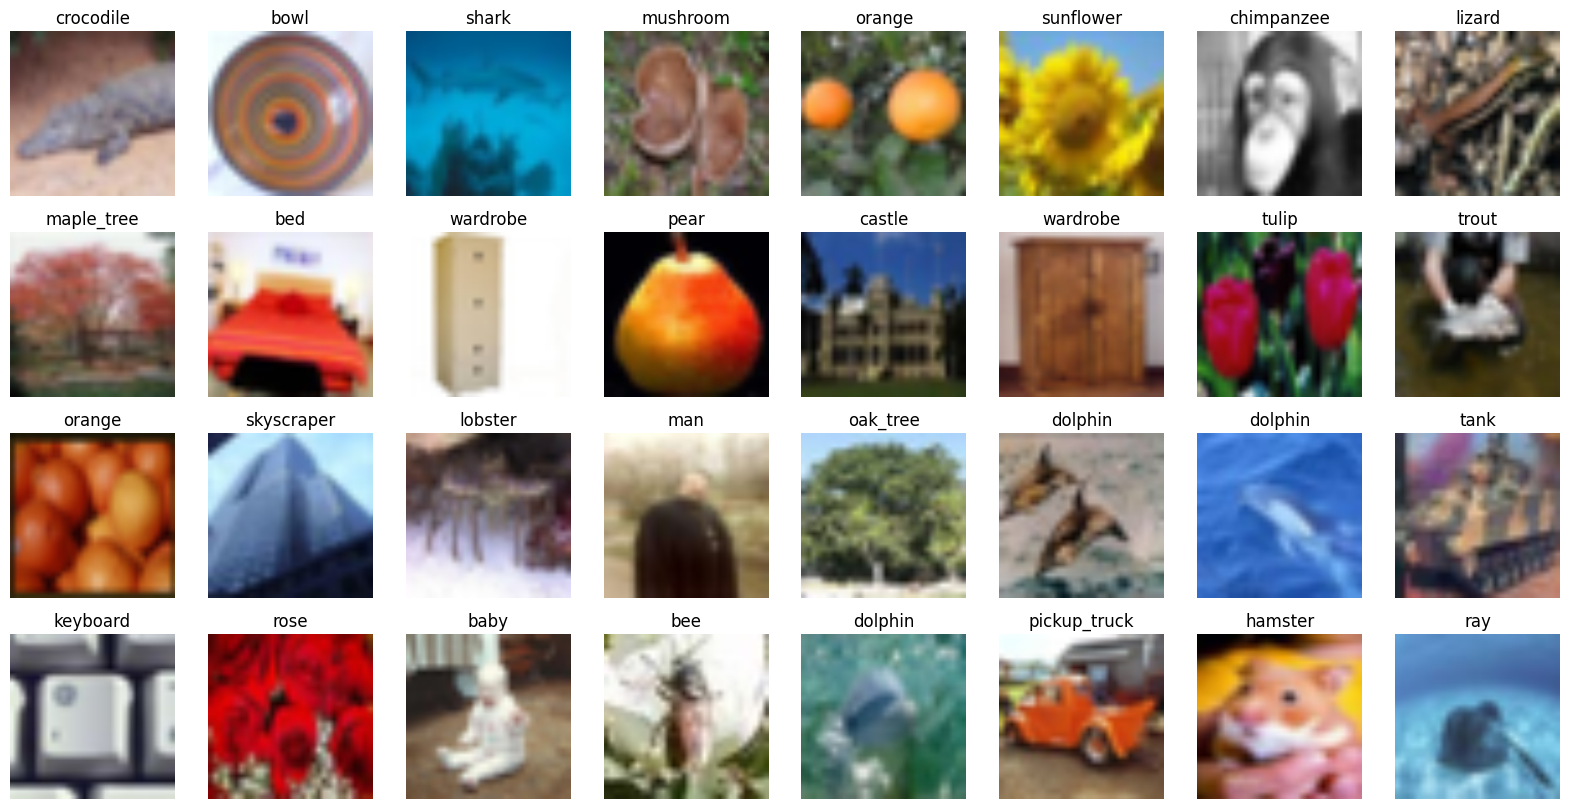

In [14]:
plt.figure(figsize=(20,10))
print("First Batch")
for i in range(0,BATCH_SIZE):
  plt.subplot(4,8,i+1)
  plt.imshow(train_batch_image[i].permute(1,2,0),cmap="gray")
  plt.title(class_names[train_batch_label[i].item()])
  plt.axis('off')

### Device agnostic code

In [15]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### Model Training

In [16]:
import torchvision.models as models
model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 172MB/s]


In [17]:
!pip install torchinfo

In [18]:
from torchinfo import summary
summary(model,input_size=(32, 3, 224, 224),col_names=["input_size", "output_size", "num_params", "trainable"])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Trainable
ResNet                                   [32, 3, 224, 224]         [32, 1000]                --                        True
├─Conv2d: 1-1                            [32, 3, 224, 224]         [32, 64, 112, 112]        9,408                     True
├─BatchNorm2d: 1-2                       [32, 64, 112, 112]        [32, 64, 112, 112]        128                       True
├─ReLU: 1-3                              [32, 64, 112, 112]        [32, 64, 112, 112]        --                        --
├─MaxPool2d: 1-4                         [32, 64, 112, 112]        [32, 64, 56, 56]          --                        --
├─Sequential: 1-5                        [32, 64, 56, 56]          [32, 64, 56, 56]          --                        True
│    └─BasicBlock: 2-1                   [32, 64, 56, 56]          [32, 64, 56, 56]          --                        True
│    │ 

### Transfer Learning

In [19]:
#Freezing the Base layers
for param in model.parameters():
  param.requires_grad=False

In [20]:
#Altering the classifier to make it apt for our purpose
torch.manual_seed(42) #CPU
torch.cuda.manual_seed(42) #GPU
model.fc=nn.Linear(in_features=512,out_features=100,bias=True)

In [21]:
summary(model,input_size=(32, 3, 224, 224),col_names=["input_size", "output_size", "num_params", "trainable"])

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Trainable
ResNet                                   [32, 3, 224, 224]         [32, 100]                 --                        Partial
├─Conv2d: 1-1                            [32, 3, 224, 224]         [32, 64, 112, 112]        (9,408)                   False
├─BatchNorm2d: 1-2                       [32, 64, 112, 112]        [32, 64, 112, 112]        (128)                     False
├─ReLU: 1-3                              [32, 64, 112, 112]        [32, 64, 112, 112]        --                        --
├─MaxPool2d: 1-4                         [32, 64, 112, 112]        [32, 64, 56, 56]          --                        --
├─Sequential: 1-5                        [32, 64, 56, 56]          [32, 64, 56, 56]          --                        False
│    └─BasicBlock: 2-1                   [32, 64, 56, 56]          [32, 64, 56, 56]          --                        False


### Training

In [22]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [23]:
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [24]:
import tqdm as tqdm
from typing import Tuple

def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device:torch.device) -> Tuple[float,float]:
      '''
      Performs a training with model trying to learn on dataloader.
      Returns train loss and train accuracy.
      '''
      model.train()
      train_loss,train_acc=0,0
      for batch, (X,y) in enumerate(dataloader):
        X,y=X.to(device),y.to(device)
        y_pred=model(X)
        loss=loss_fn(y_pred,y)
        train_loss+=loss.item()
        y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
        train_acc+=(y_pred_class==y).sum().item()/len(y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
      train_loss/=len(dataloader)
      train_acc/=len(dataloader)
      return train_loss,train_acc

def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device:torch.device) -> Tuple[float,float]:
      '''
      Performs a testing with model on dataloader.
      Returns test loss and test accuracy.
      '''
      model.eval()
      test_loss,test_acc=0,0
      with torch.inference_mode():
        for batch, (X,y) in enumerate(dataloader):
          X,y=X.to(device),y.to(device)
          y_pred=model(X)
          loss=loss_fn(y_pred,y)
          test_loss+=loss.item()
          y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
          test_acc+=(y_pred_class==y).sum().item()/len(y_pred)
      test_loss/=len(dataloader)
      test_acc/=len(dataloader)
      return test_loss,test_acc

In [25]:
def train_test(model:torch.nn.Module,
               train_dataloader:torch.utils.data.DataLoader,
               test_dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device:torch.device,
               epochs:int=5):
  '''
  Trains and tests a given PyTorch model.
  '''

  results={
      "train_loss":[],
      "train_acc":[],
      "test_loss":[],
      "test_acc":[]
  }

  for epoch in tqdm.tqdm(range(epochs)):
    train_loss,train_acc=train_step(model=model,
                                    dataloader=train_dataloader,
                                    loss_fn=loss_fn,
                                    optimizer=optimizer,
                                    device=device)
    test_loss,test_acc=test_step(model=model,
                                 dataloader=test_dataloader,
                                 loss_fn=loss_fn,
                                 device=device)
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    # if epoch%10==0:
    print(f"Epoch: {epoch} | Train loss: {train_loss} | Train acc: {train_acc} | Test loss: {test_loss} | Test acc: {test_acc}")

In [26]:
train_test(model=model,
          train_dataloader=train_dataloader,
          test_dataloader=test_dataloader,
          loss_fn=loss_fn,
          optimizer=optimizer,
          device=device,
          epochs=10)

### Predicting on user data

In [27]:
from PIL import Image
import requests
from typing import Tuple
from torchvision.transforms import Compose, Resize, ToTensor, Normalize

def prediction(model:torch.nn.Module,
               image_path:str,
               class_names:dict,
               device:torch.device,
               image_size:Tuple=(224,224),
               transform:torchvision.transforms.Compose=None
               ):
  '''
  Predicts the class of an image using a trained PyTorch image classification model.
  '''
  image=Image.open(image_path)
  if transform:
    image=transform(image)
  else:
    transform=Compose([
    Resize(image_size),
    ToTensor(),
    ])
    image=transform(image)

  image=image.unsqueeze(0)
  image=image.to(device)
  model.eval()
  with torch.inference_mode():
    y_pred=model(image)
  y_pred_probs=torch.softmax(y_pred,dim=1)
  y_pred_class=torch.argmax(y_pred_probs,dim=1)
  print(f"Prediction: {class_names[y_pred_class.item()]} | Probability: {y_pred_probs[0, y_pred_class.item()].item()}")

Downloaded /content/data/custom_image.jpg successfully.
The file is a valid image.


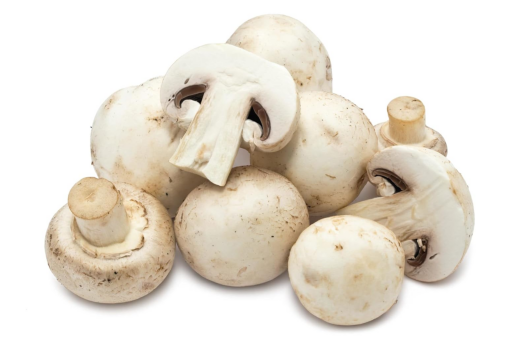

Prediction: wolf | Probability: 0.03357406705617905


In [28]:
import requests
import os
os.makedirs("data",exist_ok=True)
data_path=os.path.join("data")

# URL of the image
url = "https://m.media-amazon.com/images/I/71XMKwfQCzL._SL1500_.jpg"

# Path where the image will be saved
custom_data_path = "/content/data/custom_image.jpg"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print(f"Downloading {custom_data_path} . . .")
    # Ensure the response contains image data
    content_type = response.headers.get('content-type')
    if 'image' in content_type:
        # Create the directory if it doesn't exist
        os.makedirs(os.path.dirname(custom_data_path), exist_ok=True)
        # Open the file in write-binary mode and save the content
        with open(custom_data_path, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {custom_data_path} successfully.")

        # Verify the file is an image
        try:
            image = Image.open(custom_data_path)
            image.verify()  # Verify the image integrity
            print(f"The file is a valid image.")
        except (IOError, SyntaxError) as e:
            print(f"The file is not a valid image. Error: {e}")

        # Open and display the image
        try:
            image = Image.open(custom_data_path)
            plt.imshow(image)
            plt.axis("off")
            plt.show()
        except Exception as e:
            print(f"Error opening the image: {e}")
    else:
        print("The URL did not contain image data.")
else:
    print(f"Failed to download image. Status code: {response.status_code}")

prediction(model=model,
           image_path=custom_data_path,
           class_names=class_names,
           device=device,
           image_size=(224,224),
           transform=transform)

In [29]:
image=Image.open(custom_data_path)
transform=Compose([
    Resize((224,224)),
    ToTensor(),
    ])
image=transform(image)

In [30]:
image.shape

torch.Size([3, 224, 224])

### Saving the model

In [31]:
from pathlib import Path

def save_model(model:torch.nn.Module,
               model_name:str,
               model_path:Path):
  '''
  Saves a PyTorch model to a specified path.
  '''
  # 1. Create models directory
  MODEL_PATH = Path("models")
  MODEL_PATH.mkdir(parents=True, exist_ok=True)

  # 2. Create model save path
  MODEL_NAME = model_name
  MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

  # 3. Save the model state dict
  print(f"Saving model to: {MODEL_SAVE_PATH}")
  torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
            f=MODEL_SAVE_PATH)

In [32]:
save_model(model=model,
          model_name="resnet18_model.pth",
          model_path=Path("models"))

Saving model to: models/resnet18_model.pth
